# auc analysis  -- APPA


In [112]:
import torch, sys
sys.path.append('../src/')
import constants
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import os
from pathlib import Path
device = "cuda" if torch.cuda.is_available() else "cpu" 

def plot_roc_curve(y_true, y_pred_proba, title='Receiver Operating Characteristic (ROC) Curve', 
                  other = None, labels = None, save = None, box = False, plot=True, No = None):
    """
    绘制 ROC 曲线
    参数：
    - y_true: 实际标签
    - y_pred_proba: 预测概率
    - title: 图表标题
    - other: dict {configuration: ((label, predict))}

    返回：
    无，直接显示 ROC 曲线图表
    """
    roc_auc1 = 0
    roc_auc2 = 0
    roc_auc = 0
    # 计算 ROC 曲线的真正例率（tpr）、假正例率（fpr）以及 AUC
    if plot:
      plt.figure(figsize=(4, 4))
      plt.ylim(0,1)

    if other is not None:
      for config, values in other.items():
        label = values[0]
        predict = values[1] 
        fpr, tpr, thresholds = roc_curve(label, predict)
        roc_auc = auc(fpr, tpr)
        if No is not None:
          axs[No // 7, No % 7].plot(fpr, tpr, lw=2, label= config + ' (AUC = {:.2f}%)'.format(roc_auc*100))
          
        if plot:
          plt.plot(fpr, tpr, lw=2, label= config + ' (AUC = {:.2f}%)'.format(roc_auc*100))
    roc_auc1 = roc_auc

    fpr, tpr, thresholds = roc_curve(y_true, list(y_pred_proba))
    roc_auc = auc(fpr, tpr)
    roc_auc2 = roc_auc
    # print(title, roc_auc)
    improve = roc_auc2 - roc_auc1
    r = 0
    g = 0
    b = 0
    improve_text = ""
    if improve > 0 :
      g = improve * 50
      if g > 1:
        g = 1
      if improve*100 > 0.5:
        improve_text = '+{:.1f}'.format(improve*100)
    if improve < 0:
      r = improve * (-13)
      if r> 1:
        r = 1
      if improve*100 < -0.5:
        improve_text = '{:.1f}'.format(improve*100)

    # 绘制 ROC 曲线
    if plot and  box:
        text = plt.text(x=0.02,#文本x轴坐标 
          y=0.948, #文本y轴坐标
          s=title, #文本内容
          fontdict=dict(fontsize=20, color='r',family='monospace',),#字体属性字典
          #添加文字背景色
          bbox={'facecolor': '#F0C284', #填充色
                 'edgecolor':'b',#外框色
                'alpha': 0.5, #框透明度
                'pad': 8,#本文与框周围距离 
                },
          color = "#992224"
          )
        
    elif No is not None:
      text = axs[No // 7, No % 7].text(x=0.029,#文本x轴坐标 
      y=0.945, #文本y轴坐标
      s=title, #文本内容
      fontdict=dict(fontsize=18, color='r',family='monospace',),#字体属性字典
      #添加文字背景色
      bbox={'facecolor': '#F0C284', #填充色
              'edgecolor':'b',#外框色
            'alpha': 0.5, #框透明度
            'pad': 7,#本文与框周围距离 
            },
      color = "#992224"
      )
      text1 = axs[No // 7, No % 7].text(x=0.60,#文本x轴坐标 
      y=0.2, #文本y轴坐标
      s=improve_text, #文本内容
      fontdict=dict(fontsize=50, color='r',family='monospace',),#字体属性字典
      #添加文字背景色
      # color = "#992224"
      color = (r,g,b)
      )
      
    elif plot:
        plt.title(title)
      # text_box_props = dict(boxstyle='round', facecolor='lightblue', alpha=0.5)
      # plt.text(x=20, y=5, s=title, bbox=text_box_props, fontsize=12, color='darkblue', ha='center')

      # plt.text(x=6000, y=0.4, s=title, bbox=dict(facecolor='red', alpha=0.5))
    if labels is not None:
      if plot:
        # plt.plot(fpr, tpr, color='darkorange', lw=2, label=labels + ' (AUC = {:.4f})'.format(roc_auc))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=labels + ' (AUC = {:.2f}%)'.format(roc_auc*100))
      if No is not None:
          # axs[No // 7, No % 7].plot(fpr, tpr, lw=2, label= labels + ' (AUC = {:.4f})'.format(roc_auc))
          axs[No // 7, No % 7].plot(fpr, tpr, lw=2, label= labels + ' (AUC = {:.2f}%)'.format(roc_auc*100))
          # ax.legend()
          # ax.grid(True)
    else:
      if plot:
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=' (AUC = {:.2f}%)'.format(roc_auc*100))
    if plot:
      plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
      plt.xlim([0.0, 1.0])
      plt.ylim([0.0, 1.0])
      plt.xlabel('False Positive Rate (FPR)')
      plt.ylabel('True Positive Rate (TPR)')

      plt.legend(loc='lower right', fontsize='14')
      plt.grid(True)
    if No is not None:
      axs[No // 7, No % 7].grid(True)
      axs[No // 7, No % 7].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
      axs[No // 7, No % 7].set_xlim([0.0, 1.0])
      axs[No // 7, No % 7].set_ylim([0.0, 1.0])
      axs[No // 7, No % 7].set_xlabel('False Positive Rate (FPR)')
      axs[No // 7, No % 7].set_ylabel('True Positive Rate (TPR)')
      axs[No // 7, No % 7].legend(loc='lower right', fontsize='10')
    if save is not None:
      plt.savefig(f'{save}/{title}.png', format='png')
    return roc_auc1, roc_auc2
  

# 示例用法
# 假设 y_true 和 y_pred_proba 是你的标签和预测概率
# plot_roc_curve(y_true, y_pred_proba)


def print_roc( plot=True, record_roc = False, training_step = 0, 
               data = None, save = None, box = False, labeling_strategy = None):
  """
  for each label(disease) gets its own auc
  plot: bool, whether plot the roc plot in this function
  return auc value 
  """
  
  disease_auc = {}
  label_dis1 = None
  diff = []
  avg_auc_1 = []
  avg_auc_2 = []
  for i, disease in enumerate(constants.CHEXPERT_LABELS):
    # print(data.values)
    config = list(data.keys())[0]
    config1 = list(data.keys())[1]
    label_dis = list(data.values())[0]["labels"]
    label_dis =  label_dis[:, i]
    label_dis1 =  list(data.values())[1]["labels"]
    label_dis1 = label_dis1[:, i]
    predictions_tensor = list(data.values())[0]["predict"]
    predictions_tensor_1 = list(data.values())[1]["predict"]

    each_class_roc = {}

    for k, j in enumerate(constants.class_name):
      if j != "positive": ## negative, uncertain
        continue

      if labeling_strategy == "S1":
        pred_dis = torch.sigmoid(predictions_tensor[:, i]).cpu().numpy()
        pred_dis_1 = torch.sigmoid(predictions_tensor_1[:, i]).cpu().numpy()

        true_class = label_dis
        true_class_1 = label_dis1
      else:
        pred_dis = predictions_tensor[:, i*len(constants.class_name) + k].cpu().numpy()
        pred_dis_1 = predictions_tensor_1[:, i*len(constants.class_name) + k].cpu().numpy()

        true_class = [1 if constants.class_name[j] == y else 0 for y in label_dis]
        true_class_1 = [1 if constants.class_name[j] == y else 0 for y in label_dis1]
        assert true_class == true_class_1
      if(len(set(true_class))==1):
        print(constants.RED, "this disease have something wrong: "+constants.RESET, disease, ", ", j, "in this case set auc is 0!!!")
        each_class_roc[j] = 0
        continue
      title = f"{disease}"
      item = list(data.keys())
      if predictions_tensor_1 is not None:
        other = {item[1]: (true_class_1, pred_dis_1)}
        roc_auc1, roc_auc2 = plot_roc_curve( true_class, pred_dis,plot = plot, title = title , other = other, labels = item[0],
                                            save = save, box = box, No = i)

      else:
        roc_auc1, roc_auc2 = plot_roc_curve( true_class, pred_dis,plot = plot, title = title, labels = item[0],save = save, box = box)

    #   each_class_roc[j] = roc_auc_score(true_class, pred_dis, multi_class="ovr", average="micro",)
    # disease_auc[disease] = each_class_roc 
      each_diff = roc_auc1 - roc_auc2
      diff.append(each_diff)
      avg_auc_1.append(roc_auc1)
      avg_auc_2.append(roc_auc2)
  if plot:
    plt.show()
  print(diff)
  print(f"{config1} V.S. {config} \n({config1}) - ({config})\ntotal diff: {sum(diff)} \navg diff:  {sum(diff)/len(diff)}")
  print(f"{config1} average auc = {sum(avg_auc_1)/len(avg_auc_1)}")
  print(f"{config} average auc = {sum(avg_auc_2)/len(avg_auc_2)}")
  return roc_auc1, roc_auc2, diff

In [113]:
import json
import os


def parse_args_txt(filename):
    with open(filename, 'r') as file:
        args_str = file.read()
        args_dict = json.loads(args_str)
        return args_dict

# 使用示例
args_dict = parse_args_txt('/home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/scripts/output/None_dis_diag_des_False_densenet_None_False_binary_False_False_False_False_task_balance_S1_1_1_1_1_0_True_False/args.txt')

def comparison(path1, path2):
  assert path1.endswith(".pth")
  assert path2.endswith(".pth")
  args1 = path1.split("/")[-2]
  args1 = args1.split("_")
  if "task" in args1 and "balance" in args1:
    index = args1.index("task")
    args1[index] =  "task_balance"
    del args1[index+1]
  if "dis" in args1 and "des" in args1:
    index = args1.index("dis")
    args1[index] =  "dis_diag_des"
    del args1[index+1]
    del args1[index+2]

    
  args2 = path2.split("/")[-2]
  args2 = args2.split("_")
  print(args2)
  if "task" in args2 and "balance" in args2:
    index = args2.index("task")
    args2[index] =  "task_balance"
    del args1[index+1]
  if "dis" in args2 and "des" in args2:
    index = args2.index("dis")
    del args2[index]
    del args2[index+1]
    del args2[index+2]
    args2[index] =  "dis_diag_des"
  print(args2)
  
  for i, j, k in zip(args_dict, args1, args2):
    print(f"{i}: {j} --- {k}")
  



hint: the expected better one should be the `first element` in the data(`dict`)
like:
>data = { "densenet_contrastive":{'predict': densenet_contrastive["predictions"], 'labels':densenet_contrastive["labels"]},
        "densenet_only_APPA":{"predict":densenet_only_APPA["predictions"], "labels": densenet_only_APPA["labels"]}}

---
### 对比 引入 textual后，使用densenet作为backbone时的性能差异
**variance： `textual branch`**

结果：
1. 14个label中，6个label性能提升（差异大于0.05 AUC）
2. 6个label没有明显变化（差异小于0.05 AUC）
3. 2个label性能下降（差异大于0.05 AUC） -- 
   1. `fracture` 从  `0.7100` 降到了 `0.6879`, 降了2.2个点
   2. `Penumoia` 从 `0.6728` 降到了 `0.6675`, 降了0.5个点

[-0.005762850946603337, -0.0003473390308270652, -0.0029155544519626764, 0.0002313944813117086, -0.0009772484348756771, 0.022160333159812584, -0.010320829186722724, -0.007180211474596576, -0.00190086584482263, -0.0028816923620742507, -0.007772304324028423, 0.005300279062655289, -0.01780925992134441, -0.00651823831284859]
densenet_only_APPA V.S. densenet_contrastive 
(densenet_only_APPA) - (densenet_contrastive)
total diff: -0.03669438758692678 
avg diff:  -0.0026210276847804842
densenet_only_APPA average auc = 0.7543587441438381
densenet_contrastive average auc = 0.7569797718286188


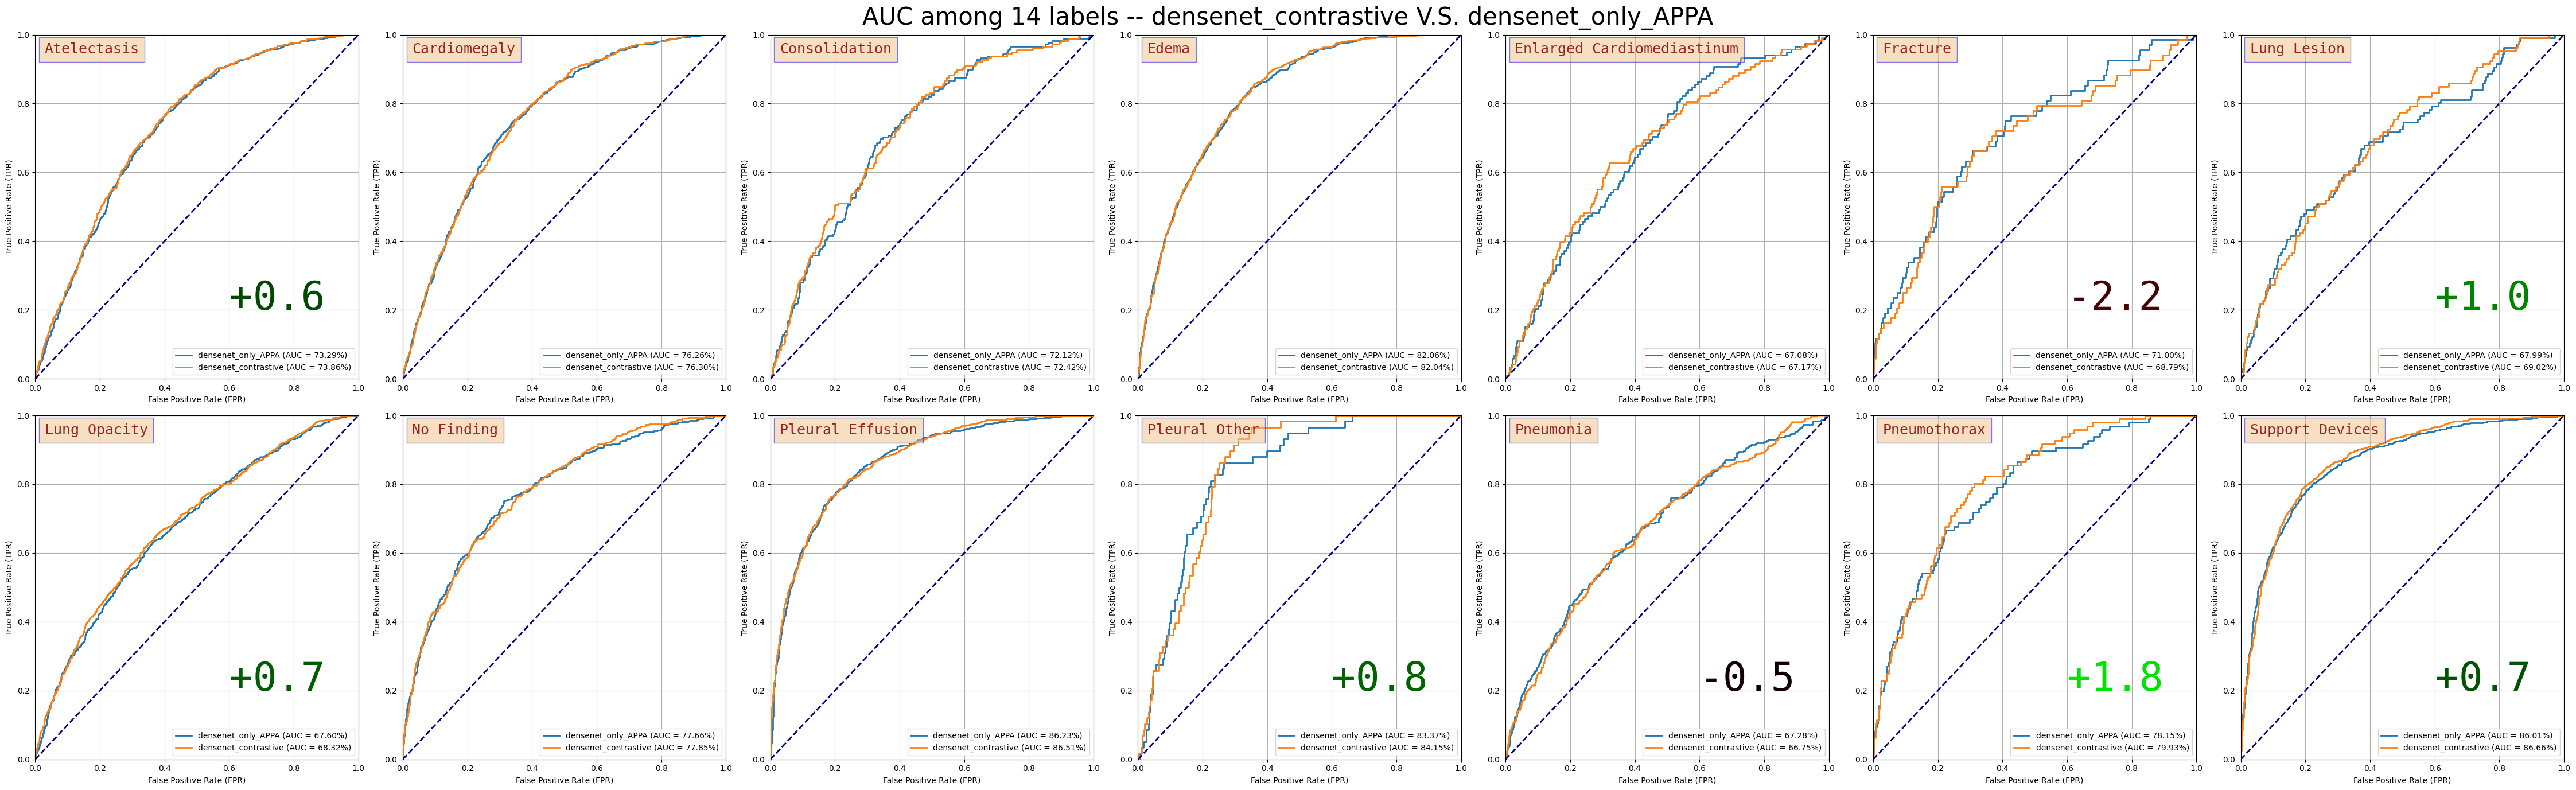

In [117]:
densenet_contrastive_p = "/home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/src/output/dump_prediction_output/None_dis_diag_des_False_densenet_None_False_binary_False_False_False_False_task_balance_S1_1_1_1_1_0_True_False/tensor.pth"
densenet_only_APPA_p = "/home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/src/output/dump_prediction_output/None_basic_True_densenet_None_False_NA_False_False_False_False_NA_S1_1_1_1_1_0_True/tensor.pth"

densenet_contrastive = torch.load(densenet_contrastive_p, map_location=torch.device(device))
densenet_only_APPA = torch.load(densenet_only_APPA_p, map_location=torch.device(device))


data = { "densenet_contrastive":{'predict': densenet_contrastive["predictions"], 'labels':densenet_contrastive["labels"]},
        "densenet_only_APPA":{"predict":densenet_only_APPA["predictions"], "labels": densenet_only_APPA["labels"]}

}
fig, axs = plt.subplots(2, 7, figsize=(45, 14))
_,_, diff = print_roc(
          data = data , box = True, plot=False,labeling_strategy="S1")
plt.suptitle(f'AUC among 14 labels -- {list(data.keys())[0]} V.S. {list(data.keys())[1]}', fontsize=30)

# 调整布局，防止子图重叠
plt.tight_layout()

# 显示图形
plt.show()
# comparison(densenet_only_APPA_p, densenet_contrastive_p, )

['Consolidation', 'Enlarged Cardiomediastinum', 'Fracture', 'Pleural Other']

---
### 对比denesnet和biomed vision encoder的性能差异

<font color=red> densenet 性能更优</font>  --- 因为densenet 是trainable的所以vision encoder 也应该是trainable以保证公平

*需要训练一个trainable的以biomedclip为backbone的 vision only model*

`在vision only 而且vision encoder是trianable的情况下`   
`对比不同的vision encoders（densenet vs biomedclip vision encoder（ViT））对最终效果的影响`

**variance： `vision encoders`**

结果：  
1. 两个encoder各有胜负， 但是从整体上看的话， 还是densenet略优



[0.002341597796143291, 0.0017494471115602206, 0.0265483063297951, -0.0012587859783357302, -0.015584058634906084, -0.03879229567933351, 0.052463932950152614, 0.008942136231520625, 0.009706548994838693, 0.0004317916088860674, -0.039816335218634036, -0.0036354600711036023, 0.006629126445000688, 0.007939890353401369]
biomed_trainable_vision_only_APPA V.S. densenet_only_APPA 
(biomed_trainable_vision_only_APPA) - (densenet_only_APPA)
total diff: 0.017665842238985707 
avg diff:  0.0012618458742132649
biomed_trainable_vision_only_APPA average auc = 0.7556205900180515
densenet_only_APPA average auc = 0.7543587441438381


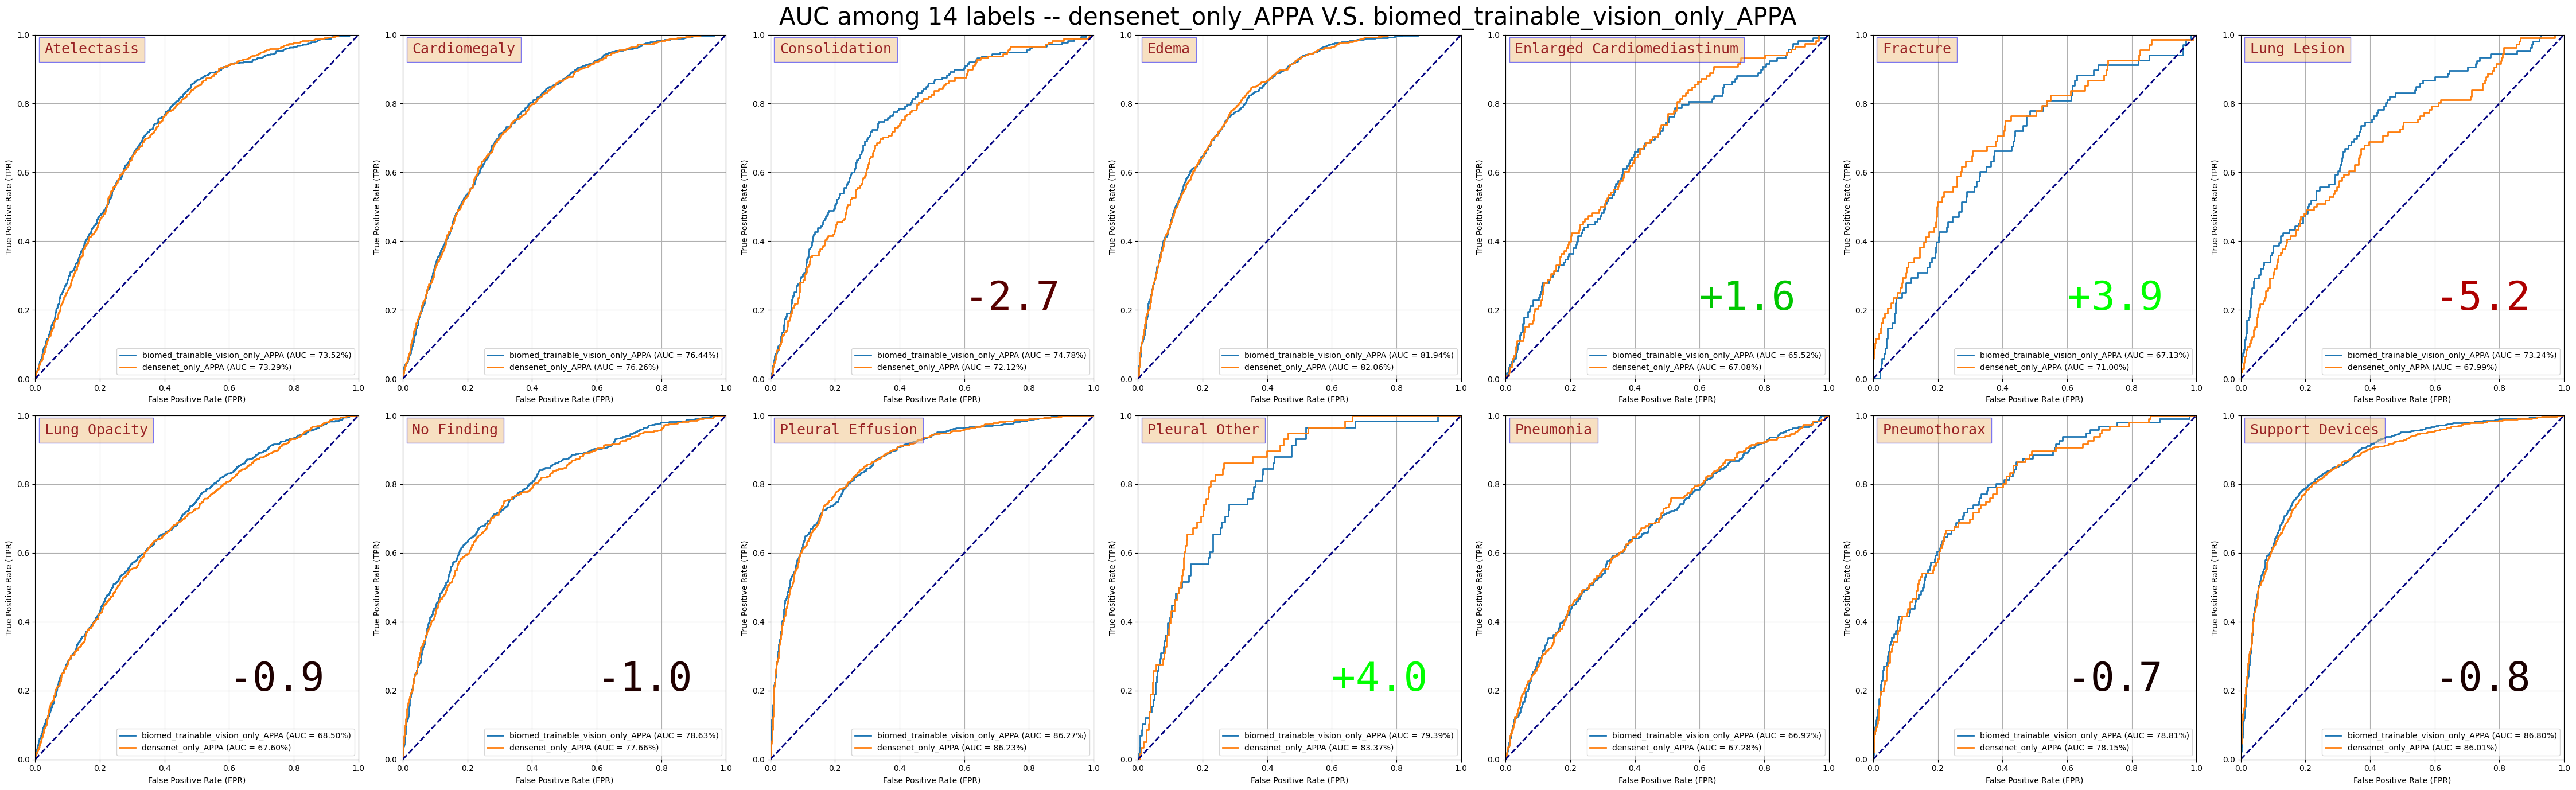

In [119]:
densenet_only_APPA_p = "/home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/src/output/dump_prediction_output/None_basic_True_densenet_None_False_NA_False_False_False_False_NA_S1_1_1_1_1_0_True/tensor.pth"
biomed_trainable_vision_only_APPA_p = "/home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/src/output/dump_prediction_output/biomedclip_dis_diag_des_True_None_None_False_binary_False_False_False_False_task_balance_S1_1_1_1_1_0_True_True/tensor.pth"

densenet_only_APPA = torch.load(densenet_only_APPA_p, map_location=torch.device(device))
biomed_trainable_vision_only_APPA = torch.load(biomed_trainable_vision_only_APPA_p, map_location=torch.device(device))

data = { 
        "densenet_only_APPA":{"predict":densenet_only_APPA["predictions"], "labels": densenet_only_APPA["labels"]},
        "biomed_trainable_vision_only_APPA":{'predict': biomed_trainable_vision_only_APPA["predictions"], 'labels':biomed_trainable_vision_only_APPA["labels"]},

}
fig, axs = plt.subplots(2, 7, figsize=(45, 14))
_,_, diff = print_roc(
          data = data , box = True, plot=False,labeling_strategy="S1")
plt.suptitle(f'AUC among 14 labels -- {list(data.keys())[0]} V.S. {list(data.keys())[1]}', fontsize=30)

# 调整布局，防止子图重叠
plt.tight_layout()

# 显示图形
plt.show()

# comparison(densenet_only_APPA_p, biomed_trainable_vision_only_APPA_p, )

---
### 对比trainable的情况下，biomed 作为backbone， 引入text对性能的影响


`biomed作为backbone， trianable的情况下`   
`对比有无textual branch对最终效果的影响`

**variance： `textual branch`**

结果：
1. 从数值上看的话, `biomed_trainable_vision_only_APPA`的性能甚至更好一些


[0.002003399566262165, -0.0005240447265798531, 0.011318724522523804, -0.002138365485479521, -0.01668346312414115, 0.023227485684539362, 0.003709947126483315, -0.0004280751885440415, 0.0038576648177183204, 0.0004399488810939989, 1.8244845831127954e-05, 0.002282197331702318, -0.02130258610415936, -0.004348948692982191]
biomed_trainable_vision_only_APPA V.S. biomed_trainable_APPA 
(biomed_trainable_vision_only_APPA) - (biomed_trainable_APPA)
total diff: 0.0014321294542682939 
avg diff:  0.00010229496101916384
biomed_trainable_vision_only_APPA average auc = 0.7556205900180515
biomed_trainable_APPA average auc = 0.7555182950570323


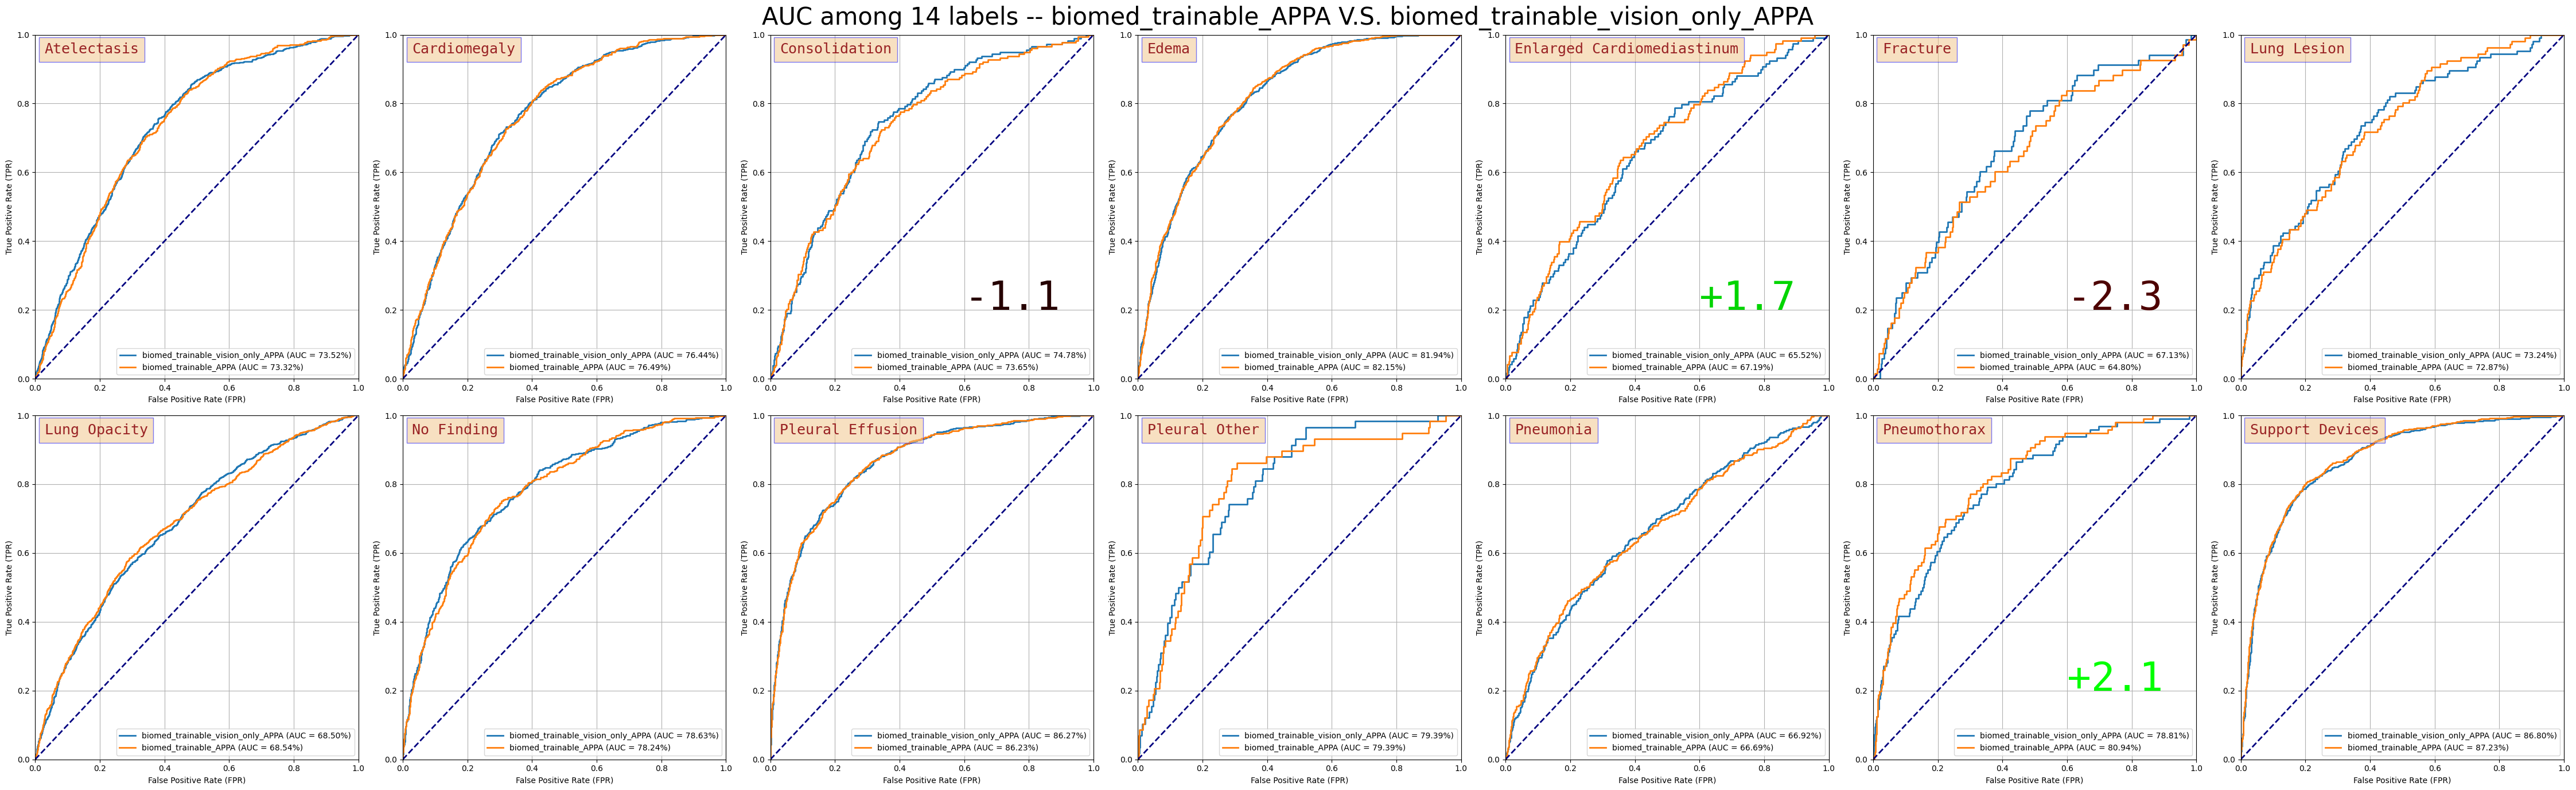

In [120]:
biomed_trainable_APPA_p = "/home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/src/output/dump_prediction_output/biomedclip_dis_diag_des_False_None_None_False_binary_False_False_False_False_task_balance_S1_1_1_1_1_0_True_True/tensor.pth"
biomed_trainable_vision_only_APPA_p = "/home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/src/output/dump_prediction_output/biomedclip_dis_diag_des_True_None_None_False_binary_False_False_False_False_task_balance_S1_1_1_1_1_0_True_True/tensor.pth"


biomed_trainable_APPA = torch.load(biomed_trainable_APPA_p, map_location=torch.device(device))
biomed_trainable_vision_only_APPA = torch.load(biomed_trainable_vision_only_APPA_p, map_location=torch.device(device))

data = {"biomed_trainable_APPA":{"predict":biomed_trainable_APPA["predictions"], "labels": biomed_trainable_APPA["labels"]}, 
        "biomed_trainable_vision_only_APPA":{'predict': biomed_trainable_vision_only_APPA["predictions"], 'labels':biomed_trainable_vision_only_APPA["labels"]},
        

}
fig, axs = plt.subplots(2, 7, figsize=(45, 14))
_,_, diff = print_roc(
          data = data , box = True, plot=False,labeling_strategy="S1")
plt.suptitle(f'AUC among 14 labels -- {list(data.keys())[0]} V.S. {list(data.keys())[1]}', fontsize=30)

# 调整布局，防止子图重叠
plt.tight_layout()

# 显示图形
plt.show()

---
### 对比trainable的影响， 
`biomed作为bacbone， 引入text`   
`对比fine-tuning的pre-trained对最终效果的影响`

**variance： `trainable_VisionEncoder`**

结果：
1. 14个label中，11个label性能提升
2. 2个label没有明显变化（差异小于0.05 AUC）
3. 一个label性能下降 -- `fracture` 从  `0.6796772514315461` 降到了 `0.6480270692347736`, 降了`3.2`个点


[-0.0075394173846786705, -0.018729589277668324, 0.0016771163117925703, -0.029451889581358248, 0.004932050694762435, 0.031650182196772514, -0.03524449770159299, -0.019026715163677488, -0.028878704278970213, -0.035910487532969326, -0.012309189320683478, -0.022281687628222357, -0.052716452151114424, -0.03313714327784634]
biomed_APPA V.S. biomed_trainable_APPA 
(biomed_APPA) - (biomed_trainable_APPA)
total diff: -0.25696642409545434 
avg diff:  -0.018354744578246738
biomed_APPA average auc = 0.7371635504787857
biomed_trainable_APPA average auc = 0.7555182950570323


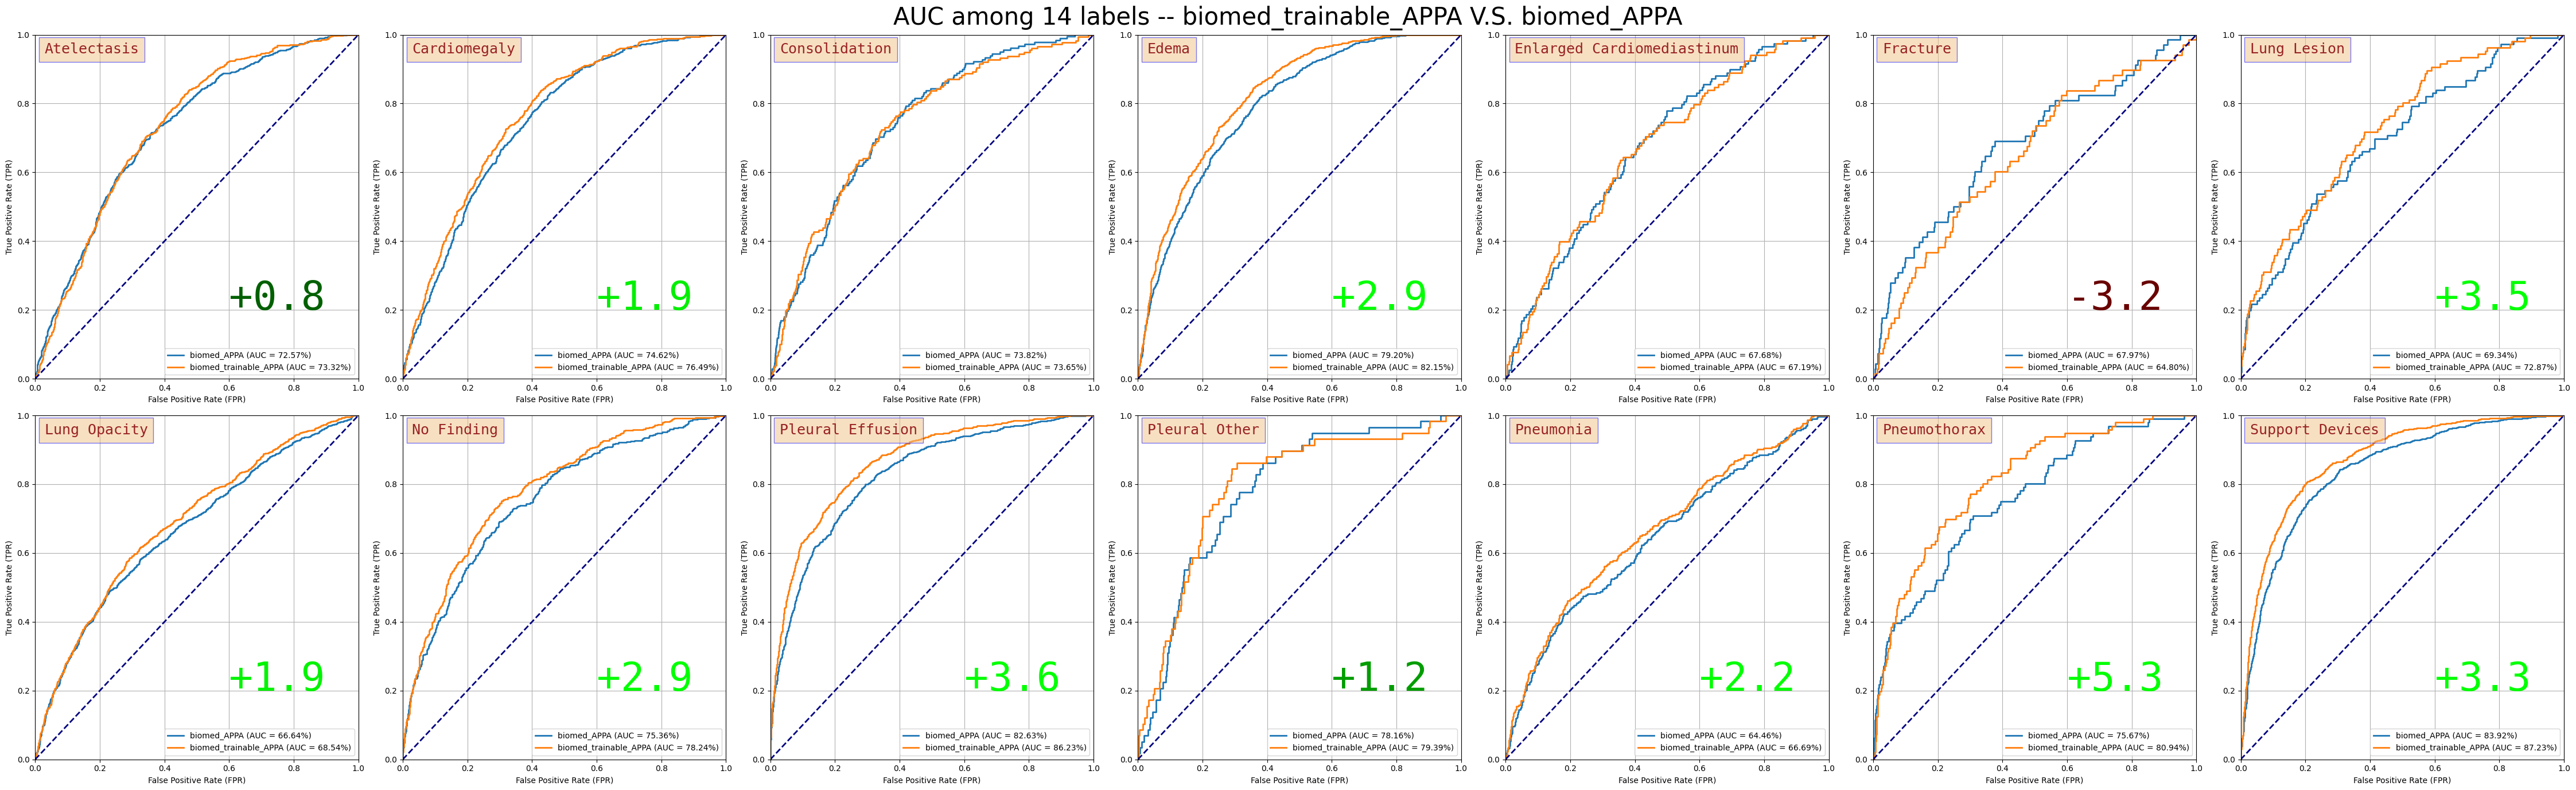

In [116]:
biomed_APPA_p = "/home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/src/output/dump_prediction_output/biomedclip_dis_diag_des_False_None_None_False_binary_False_False_False_False_task_balance_S1_1_1_1_1_0_True/tensor.pth"
biomed_trainable_APPA_p = "/home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/src/output/dump_prediction_output/biomedclip_dis_diag_des_False_None_None_False_binary_False_False_False_False_task_balance_S1_1_1_1_1_0_True_True/tensor.pth"


biomed_APPA = torch.load(biomed_APPA_p, map_location=torch.device(device))
biomed_trainable_APPA = torch.load(biomed_trainable_APPA_p, map_location=torch.device(device))

data = {"biomed_trainable_APPA":{"predict":biomed_trainable_APPA["predictions"], "labels": biomed_trainable_APPA["labels"]}, 
        "biomed_APPA":{'predict': biomed_APPA["predictions"], 'labels':biomed_APPA["labels"]},
        

}
fig, axs = plt.subplots(2, 7, figsize=(45, 14))
_,_, diff = print_roc(
          data = data , box = True, plot=False,labeling_strategy="S1")
plt.suptitle(f'AUC among 14 labels -- {list(data.keys())[0]} V.S. {list(data.keys())[1]}', fontsize=30)

# 调整布局，防止子图重叠
plt.tight_layout()

# 显示图形
plt.show()

---

4/16 目前的好消息是说 加了text embedding后的操作普遍则整体上能够提升性能

但是 不好的时，在有些disease 上performance会掉

目前最具参考性的densenet上使用text前后的性能对比
其中`fracture`存在大幅下降的现象 `-2.2`

In [111]:
import constants as c
prompts = c.CHEXPERT_DESCRIPTIONS
prompts["Fracture"]

{'positive': 'A fracture is a broken bone, which can be seen on imaging studies such as X-rays.',
 'negative': 'No evidence of bone fracture is present.'}

---
### comparison between different prompts
1. basic 
2. description and diagnosis 


使用biomedclip作为backbone， 在textual branch中使用不同的prompt对比性能差异   
configuration：
> backbone : biomedclip   
> prompt : dis_diag_des  
> vision_only : False  
> backbone_v : None  
> save_dir : None  
> learnable_weight : False  
> high_order : binary  
> two_phases : False  
> no_orthogonize : False  
> no_contrastive : False  
> uncertain_based_weight : False  
> weight_strategy : task_balance  
> labeling_strategy : S1  
> contrastive_param : 1  
> classification_param : 1  
> orthogonal_param : 1  
> graph_param : 1  
> trainable_PLM : 0  
> AP_PA_view : True  
> trainable_VisionEncoder : False  

  

---
### comparison between combination of different losses

model configuration :
> backbone : biomedclip   
> prompt : dis_diag_des / basic (depend on the performance obtained in the previous sections) 
> vision_only : True/False  
> backbone_v : None  
> high_order : None/binary  
> no_orthogonize : False/True
> no_contrastive : False/True
> weight_strategy : task_balance  
> labeling_strategy : S1  
> trainable_PLM : 0   
> AP_PA_view : True  
> trainable_VisionEncoder : True (prefer using trainable vision encoder to obtain the higher performance)  

loss ablation study
1. baseline(vision only)
2. baseline + contrastive 
3. baseline + contrastive + orthogonal
4. baseline + contrastive + orthogonal + high-order